# Prerequisites

#### Upgrading pip just to be sure

In [1]:
pip install --upgrade pip

  Using cached pip-24.1.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.


## Installing Python SDK
### The Python SDK for the Gemini API, is contained in the google-generativeai package.

In [2]:
pip install -q -U google-generativeai

Note: you may need to restart the kernel to use updated packages.


## Import Packages

#### Jupyter notebook Widgets

In [3]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

## Using dotenv

In [5]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [6]:
from dotenv import load_dotenv
import os
load_dotenv()
google_api_key = os.getenv('GOOGLE_API_KEY')

## List models

Using list_models to see the available Gemini models:

The rate limit for Gemini-Pro models is 60 requests per minute (RPM).

- `gemini-pro`: optimized for text-only prompts.
- `gemini-pro-vision`: optimized for text-and-images prompts.


In [7]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
# GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=google_api_key)

In [8]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


## Generate text from text inputs
For text-only prompts, use the gemini-pro model:

In [9]:
model = genai.GenerativeModel('gemini-pro')

In [10]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: total: 0 ns
Wall time: 8.48 s


In [11]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "**Philosophical and Existential Perspectives:**\n\n* **Existentialism:** There is no innate meaning, and individuals must create their own meaning through their choices and actions.\n* **Nihilism:** Life is ultimately meaningless and devoid of purpose.\n* **Absurdism:** Life is inherently meaningless, but individuals can find meaning by embracing the absurdity and living authentically.\n* **Stoicism:** Accept the limitations of life and focus on living in accordance with reason and virtue.\n* **Hinduism and Buddhism:** Karma and reincarnation create a cycle of existence, the goal of which is to break free from suffering and achieve moksha (liberation).\n\n**Scientific and Evolutionary Perspectives:**\n\n* **Survival and Reproduction:** The primary purpose of

In [12]:
response.text

"**Philosophical and Existential Perspectives:**\n\n* **Existentialism:** There is no innate meaning, and individuals must create their own meaning through their choices and actions.\n* **Nihilism:** Life is ultimately meaningless and devoid of purpose.\n* **Absurdism:** Life is inherently meaningless, but individuals can find meaning by embracing the absurdity and living authentically.\n* **Stoicism:** Accept the limitations of life and focus on living in accordance with reason and virtue.\n* **Hinduism and Buddhism:** Karma and reincarnation create a cycle of existence, the goal of which is to break free from suffering and achieve moksha (liberation).\n\n**Scientific and Evolutionary Perspectives:**\n\n* **Survival and Reproduction:** The primary purpose of life is to survive and pass on one's genes.\n* **Adaptation and Evolution:** Life evolves to adapt to its environment and ensure its continued existence.\n* **Complexity and Emergence:** Life is a process of increasing complexity 

In [13]:
to_markdown(response.text)

> **Philosophical and Existential Perspectives:**
> 
> * **Existentialism:** There is no innate meaning, and individuals must create their own meaning through their choices and actions.
> * **Nihilism:** Life is ultimately meaningless and devoid of purpose.
> * **Absurdism:** Life is inherently meaningless, but individuals can find meaning by embracing the absurdity and living authentically.
> * **Stoicism:** Accept the limitations of life and focus on living in accordance with reason and virtue.
> * **Hinduism and Buddhism:** Karma and reincarnation create a cycle of existence, the goal of which is to break free from suffering and achieve moksha (liberation).
> 
> **Scientific and Evolutionary Perspectives:**
> 
> * **Survival and Reproduction:** The primary purpose of life is to survive and pass on one's genes.
> * **Adaptation and Evolution:** Life evolves to adapt to its environment and ensure its continued existence.
> * **Complexity and Emergence:** Life is a process of increasing complexity and organization, leading to the emergence of consciousness and intelligence.
> 
> **Purpose-Driven Perspectives:**
> 
> * **Religious and Spiritual:** God or a higher power gives life purpose and meaning.
> * **Humanistic:** Life has the inherent potential for growth, fulfillment, and contribution to society.
> * **Personal and Subjective:** Individuals define their own meaning based on their values, experiences, and aspirations.
> 
> **Perspectives Emphasizing Choice and Agency:**
> 
> * **Existential Freedom:** Individuals have the freedom to create their own meaning and live authentically.
> * **Responsibility:** We are responsible for finding meaning in our lives and using our time wisely.
> * **Self-Actualization:** Life is about realizing one's full potential and living a meaningful, fulfilling life.
> 
> **Additional Considerations:**
> 
> * Meaning can be found in a variety of sources, such as work, relationships, hobbies, art, and nature.
> * It is often an ongoing process rather than a static destination.
> * The search for meaning can be both challenging and rewarding.

In [14]:
%%time
response = model.generate_content("Who is better Tony Stark or Bruce Wayne?")
to_markdown(response.text)

CPU times: total: 0 ns
Wall time: 6.97 s


> Tony Stark and Bruce Wayne are two of the most iconic superheroes in comic book history. Both are brilliant inventors and master strategists, but they have very different approaches to crime-fighting.
> 
> Tony Stark is a billionaire playboy who uses his wealth to fund his superhero activities. He is known for his arrogance and quick wit, but he is also deeply compassionate and loyal to his friends and family. As Iron Man, he relies on his advanced technology and suit to defeat his enemies.
> 
> Bruce Wayne is a billionaire orphan who was driven to become a crime-fighter after witnessing the murder of his parents. He is a skilled martial artist and detective, and he has a deep understanding of the criminal mind. As Batman, he uses his wealth to fund his Batcave and his arsenal of gadgets, but he also relies on his physical and mental abilities to fight crime.
> 
> So, who is better? Tony Stark or Bruce Wayne? It's hard to say definitively. Both superheroes have their own strengths and weaknesses. Ultimately, it depends on what you value in a superhero.
> 
> If you prefer a superhero who is flashy, arrogant, and relies on technology, then Iron Man is the better choice. If you prefer a superhero who is more grounded, serious, and relies on his own skills, then Batman is the better choice.
> 
> Here is a table comparing the two superheroes:
> 
> | Characteristic | Tony Stark | Bruce Wayne |
> |---|---|---|
> | Alter ego | Iron Man | Batman |
> | Wealth | Billionaire | Billionaire |
> | Personality | Arrogant, quick-witted, compassionate | Serious, driven, intelligent |
> | Abilities | Superhuman strength, durability, and flight | Martial arts, detective skills, strategic planning |
> | Motivation | To protect the world from evil | To avenge the deaths of his parents and to protect Gotham City |
> | Technology | Advanced suit and gadgets | Batcave, Batmobile, and other gadgets |
> 
> Ultimately, the question of who is better, Tony Stark or Bruce Wayne, is a matter of personal preference. Both superheroes are iconic and have inspired generations of fans.

## Using stream()
Stream returns the output as it is generated. It makes it appear that generation of output is happening faster.

When streaming, some response attributes are not available until you've iterated through all the response chunks.

In [15]:
%%time
response = model.generate_content("Who is better Tony Stark or Bruce Wayne?", stream=True)

CPU times: total: 0 ns
Wall time: 1.07 s


In [15]:
for chunk in response:
  print(chunk.text)
  #print("_"*80)

Tony Stark and Bruce Wayne are two of the most iconic superheroes in comic book history. Both are brilliant inventors and master strategists, but they have very different approaches to crime-fighting.

Tony Stark is a billionaire playboy who uses his wealth to fund his superhero activities. He is known for his arrogance and quick wit, but he is also deeply compassionate and loyal to his friends and family. As Iron Man, he relies on his advanced technology and suit to defeat his enemies.

Bruce Wayne is a billionaire orphan who was driven to become a crime-fighter after witnessing the murder of his parents. He is a skilled martial artist and detective, and he has a deep understanding of the criminal mind. As Batman, he uses his wealth to fund his Batcave and his arsenal of gadgets, but he also relies on his physical and mental abilities to fight crime.

So, who is better? Tony Stark or Bruce Wayne? It's hard to say definitively. Both superheroes have their own strengths and weaknesses. 

## Generate text from image and text inputs

Gemini provides a multimodal model - `gemini-pro-vision` that accepts both text and images as inputs.

The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.
.

In [17]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


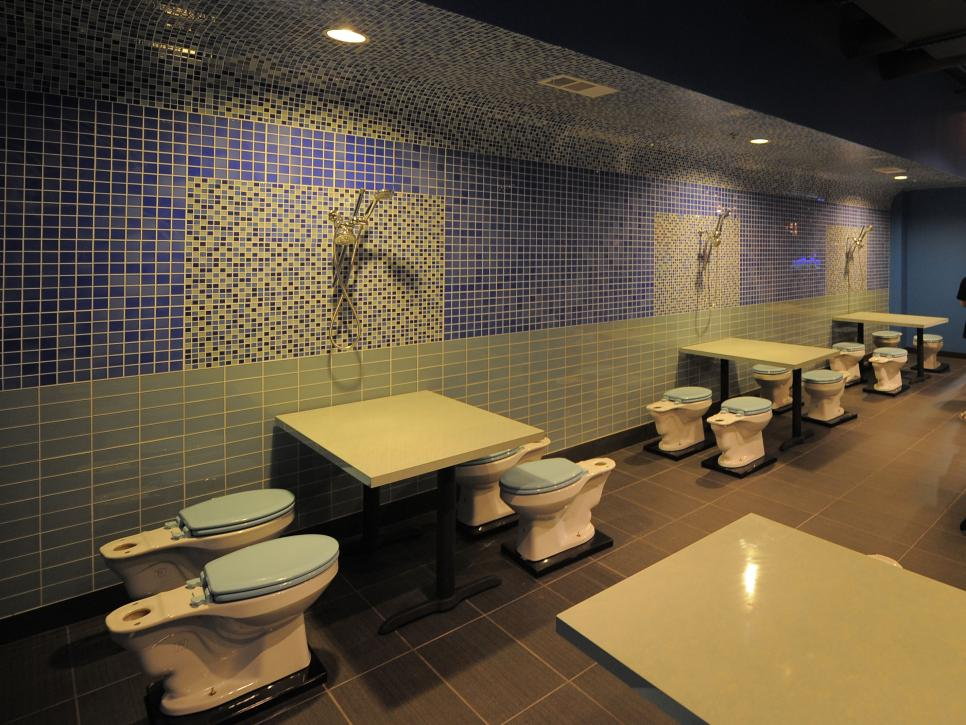

In [16]:
import PIL.Image
img = PIL.Image.open('badd.jpeg')
img

In [17]:
model = genai.GenerativeModel('gemini-pro-vision')

In [18]:
response = model.generate_content(img)

to_markdown(response.text)

>  The image shows a room with several tables and chairs. The chairs are made of toilets, and the tables are made of glass. The walls are tiled with blue and white tiles. There are also several shower heads on the walls.

In [19]:
import PIL.Image
img = PIL.Image.open('burgers.jpg')

response = model.generate_content(img)

to_markdown(response.text)

>  The image shows a plate with four cheeseburgers. The burgers are made with sesame seed buns, lettuce, tomato, cheese, and beef patties.

In [20]:
%%time
response = model.generate_content(["Write a short, critic note on how should this restaurant be made family friendly and waht changes should the restaurant do to make it kid and family friendly.", img])
response.resolve()

CPU times: total: 0 ns
Wall time: 6.7 s


In [21]:
to_markdown(response.text)

>  The restaurant should make the following changes to become more family friendly:
> 
> 1. Offer a children's menu with smaller portions and healthier options.
> 2. Provide high chairs and booster seats for children.
> 3. Have a designated play area for children.
> 4. Offer family-friendly activities, such as games or crafts.
> 5. Have a diaper changing station in the restroom.
> 6. Market the restaurant to families by advertising in family-friendly publications and offering family-friendly promotions.
> 7. Train staff to be friendly and welcoming to children.

## Chat conversations
Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list..

In [22]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

In [23]:
response = chat.send_message("In one sentence, explain how a computer works to a old child.")
to_markdown(response.text)

> A computer works like a smart helper that follows our instructions, using special parts like a brain and memory to perform tasks, display information, and store our work.

In [24]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a old child."
 }
 role: "user",
 parts {
   text: "A computer works like a smart helper that follows our instructions, using special parts like a brain and memory to perform tasks, display information, and store our work."
 }
 role: "model"]